# Sheriff Crime Data

1. Import DATA
  * Show the data
  * Check size/shape
2. this
  * dis
3. Preprocessing
  * Date conversion
    * One-Hot-Encode MONTHS
      * Create a mapping function or dictionary (use LabelEncoder(); ez)
      * then o.h.e.
    * One-Hot-Encode DAY?
      * create a range so it's not so much?
        * example (1 - 10, 11 - 20, 21 - 31); 3 categories
      * then o.h.e
    * One-Hot_Encode TIME?
      * same as DAY.. create categories/range
        * (morning, 0:00 - 11:59a), (afternoon, 12 - 5:59p), (evening, 6 - 11:59p)
        * or more specific?
      * then o.h.e
    * YEAR.... ez

## Import the data

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

sheriff_df = pd.read_csv("LA_SHERIFF__CRIMES_-_LAST_12_MONTHS.csv")

### Print it out

In [311]:
sheriff_df[::20000]

,CRIME_DATE,CRIME_YEAR,CRIME_CATEGORY_NUMBER,CRIME_CATEGORY_DESCRIPTION,STATISTICAL_CODE,STATISTICAL_CODE_DESCRIPTION,VICTIM_COUNT,STREET,CITY,STATE,ZIP,LATITUDE,LONGITUDE,GANG_RELATED,REPORTING_DISTRICT,STATION_IDENTIFIER,STATION_NAME,CRIME_IDENTIFIER,LOCATION
0,01/08/2017 11:01:30 AM,2017,6,LARCENY THEFT,389,"THEFT, PETTY: Other (From Prvt Res, Boat, Plan...",1,44240 4TH ST E,LANCASTER,CA,NaN,34.686938,-118.123960,N,1133,CA0190024,LANCASTER,18052353,"44240 4TH ST E\nLANCASTER, CA\n(34.68693834371..."
20000,12/07/2016 04:12:00 AM,2016,24,VANDALISM,263,VANDALISM FELONY,1,610 W CORREGIDOR ST,COMPTON,CA,90220.0,33.889429,-118.232992,N,2835,CA0190042,COMPTON,17987318,"610 W CORREGIDOR ST\nCOMPTON, CA 90220\n(33.88..."
40000,05/24/2017 02:05:00 PM,2017,7,GRAND THEFT AUTO,91,GRAND THEFT VEHICLE (GTA): Automobile/Passenge...,1,9300 SIERRA VISTA DR,PICO RIVERA,CA,NaN,33.967714,-118.098478,N,1518,CA0190015,PICO RIVERA,18216008,"9300 SIERRA VISTA DR\nPICO RIVERA, CA\n(33.967..."
60000,03/25/2017 08:03:00 AM,2017,7,GRAND THEFT AUTO,91,GRAND THEFT VEHICLE (GTA): Automobile/Passenge...,1,9930 CEDAR ST,BELLFLOWER,CA,90706.0,33.871000,-118.122006,N,1335,CA0190013,LAKEWOOD,18151622,"9930 CEDAR ST\nBELLFLOWER, CA 90706\n(33.87099..."
80000,10/19/2016 04:10:00 AM,2016,5,BURGLARY,71,"BURGLARY, OTHER STRUCTURE: Night, Entry By Force",1,9010 SLAUSON AVE,PICO RIVERA,CA,90660.0,33.971104,-118.104307,N,1517,CA0190015,PICO RIVERA,17939209,"9010 SLAUSON AVE\nPICO RIVERA, CA 90660\n(33.9..."
100000,11/11/2016 03:11:00 PM,2016,16,NARCOTICS,183,Under The Influence Of Narcotic 11550 HS. Does...,1,5300 WHITTIER BLVD,LOS ANGELES,CA,90022.0,34.020380,-118.155995,N,286,CA0190002,EAST LOS ANGELES,17963711,"5300 WHITTIER BLVD\nLOS ANGELES, CA 90022\n(34..."
120000,07/17/2017 11:07:00 AM,2017,24,VANDALISM,263,VANDALISM FELONY,1,14340 PIONEER BLVD,NORWALK,CA,NaN,33.901496,-118.082564,N,455,CA0190004,NORWALK,18275408,"14340 PIONEER BLVD\nNORWALK, CA\n(33.901495512..."
140000,11/16/2016 12:11:00 AM,2016,10,FRAUD AND NSF CHECKS,117,IDENTITY THEFT (GOODS/SERVICES/CREDIT),1,16800 ARROW HWY,AZUSA,CA,91702.0,34.107291,-117.918695,N,867,CA0190008,SAN DIMAS,18180858,"16800 ARROW HWY\nAZUSA, CA 91702\n(34.10729138..."
160000,09/15/2017 01:09:00 PM,2017,13,NON-AGGRAVATED ASSAULTS,144,"ASSAULT, NON-AGG: Hands, Feet, Fist, Etc.",1,21900 S MONETA AVE,CARSON,CA,90745.0,33.829081,-118.282963,N,1617,CA0190016,CARSON,18333379,"21900 S MONETA AVE\nCARSON, CA 90745\n(33.8290..."


### Print size/shape of Dataset

In [312]:
print(sheriff_df.shape)

(170480, 19)


### Define features and label

In [313]:
''' # saved for convenience; might be useful if we try k-means clustering.. if we have time

all_columns = ['CRIME_DATE', 'CRIME_YEAR', 'CRIME_CATEGORY_NUMBER',
       'CRIME_CATEGORY_DESCRIPTION', 'STATISTICAL_CODE',
       'STATISTICAL_CODE_DESCRIPTION', 'VICTIM_COUNT', 'STREET', 'CITY',
       'STATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'GANG_RELATED',
       'REPORTING_DISTRICT', 'STATION_IDENTIFIER', 'STATION_NAME',
       'CRIME_IDENTIFIER', 'LOCATION']
'''

# edit features to include here
feat_cols = ['CRIME_DATE', 'CRIME_YEAR', 'CITY']

label_col = ["CRIME_CATEGORY_NUMBER"]


### Assign FEATURES and LABELS
#### _Note_ : Rows where CITY feature/value is missing are filtered out

In [314]:
filter_sheriff_df = sheriff_df[pd.notnull(sheriff_df['CITY']) ] # filter out rows where CITY value is missing

X_sheriff_df = filter_sheriff_df[feat_cols] # FEATURES column
y_sheriff_df = filter_sheriff_df[label_col] # LABELS

print(sheriff_df.shape[0] - X_sheriff_df.shape[0], "rows were filtered out!")
print("We still have", X_sheriff_df.shape[0], "left :)")

3119 rows were filtered out!
We still have 167361 left :)


### Print out FEATURE columns

In [315]:
X_sheriff_df.head()

,CRIME_DATE,CRIME_YEAR,CITY
0,01/08/2017 11:01:30 AM,2017,LANCASTER
1,10/09/2016 01:10:00 PM,2016,COMPTON
2,07/30/2017 12:07:00 PM,2017,ROWLAND HEIGHTS
4,08/06/2017 05:08:00 AM,2017,PALMDALE
6,07/12/2017 10:07:00 AM,2017,CHATSWORTH


### Print out LABEL column

In [316]:
y_sheriff_df.head()

,CRIME_CATEGORY_NUMBER
0,6
1,23
2,6
4,5
6,23


### Print size/shape of FEATURE and LABEL columns

In [317]:
print(X_sheriff_df.shape)
print(y_sheriff_df.shape)

(167361, 3)
(167361, 1)


## Preprocessing

### Define month dict

In [318]:
month_dict = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

### Make a copy of ```X_sherifff_df```

In [319]:
X_prep_df = X_sheriff_df.copy() # X is capitalized...

### Print copy

In [320]:
X_prep_df.head()

,CRIME_DATE,CRIME_YEAR,CITY
0,01/08/2017 11:01:30 AM,2017,LANCASTER
1,10/09/2016 01:10:00 PM,2016,COMPTON
2,07/30/2017 12:07:00 PM,2017,ROWLAND HEIGHTS
4,08/06/2017 05:08:00 AM,2017,PALMDALE
6,07/12/2017 10:07:00 AM,2017,CHATSWORTH


### Check shape of copy

In [321]:
X_prep_df.shape

(167361, 3)

### Split DATE into CRIME_MONTH and CRIME_DAY

In [322]:
#First we are just getting the date of the crime here

X_prep_df['DATE'] = X_prep_df.CRIME_DATE.str.split('\s+').str[0]
X_prep_df['CRIME_MONTH'] = X_prep_df['DATE'].str.split("/").str[0]
X_prep_df['CRIME_DAY'] = X_prep_df['DATE'].str.split("/").str[1]


### Print out DATE, CRIME_MONTH, and CRIME_DAY and check SHAPE

In [323]:
print(X_prep_df['DATE'].head())
print(X_prep_df['DATE'].shape, "\n")

print(X_prep_df['CRIME_MONTH'].head())
print(X_prep_df['CRIME_MONTH'].shape, "\n")

print(X_prep_df['CRIME_DAY'].head())
print(X_prep_df['CRIME_DAY'].shape)

0    01/08/2017
1    10/09/2016
2    07/30/2017
4    08/06/2017
6    07/12/2017
Name: DATE, dtype: object
(167361,) 

0    01
1    10
2    07
4    08
6    07
Name: CRIME_MONTH, dtype: object
(167361,) 

0    08
1    09
2    30
4    06
6    12
Name: CRIME_DAY, dtype: object
(167361,)


### Convert TIME to TIME24 (24 hour time) and PRINT

In [324]:
#Now we can get the time of the crime and convert it to 24 hour time
X_prep_df['TIME24'] = pd.to_datetime(X_sheriff_df['CRIME_DATE'], format='%m/%d/%Y %I:%M:%S %p').dt.time.astype(str)

X_prep_df['TIME24'].head()

0    11:01:30
1    13:10:00
2    12:07:00
4    05:08:00
6    10:07:00
Name: TIME24, dtype: object

### Split TIME24 in to HOUR and MINUTE and PRINT

In [325]:
X_prep_df['CRIME_HOUR']= X_prep_df['TIME24'].str.split(":").str[0]
X_prep_df['CRIME_MINUTE'] = X_prep_df['TIME24'].str.split(":").str[1]

print(X_prep_df['TIME24'].head(), "\n")
print(X_prep_df['CRIME_HOUR'].head(), "\n")
print(X_prep_df['CRIME_MINUTE'].head(), "\n")

0    11:01:30
1    13:10:00
2    12:07:00
4    05:08:00
6    10:07:00
Name: TIME24, dtype: object 

0    11
1    13
2    12
4    05
6    10
Name: CRIME_HOUR, dtype: object 

0    01
1    10
2    07
4    08
6    07
Name: CRIME_MINUTE, dtype: object 



### CITY encoding/mapping

In [326]:
class_le = LabelEncoder() # does above automatically; but returns as numpy array
city_mapping = class_le.fit_transform(X_prep_df["CITY"])
print(city_mapping[:5])

city_mapping_inverse = class_le.inverse_transform(city_mapping) # undo transform - back to string
print(city_mapping_inverse[:5])

[158  69 251 220  54]
['LANCASTER' 'COMPTON' 'ROWLAND HEIGHTS' 'PALMDALE' 'CHATSWORTH']


### Add CITY_MAP to preprocessed DF

In [327]:
X_prep_df["CITY_MAP"] = city_mapping
X_prep_df["CITY_MAP"].head()

0    158
1     69
2    251
4    220
6     54
Name: CITY_MAP, dtype: int64

### Print out all preprocessed data

In [328]:
X_prep_df.head()

,CRIME_DATE,CRIME_YEAR,CITY,DATE,CRIME_MONTH,CRIME_DAY,TIME24,CRIME_HOUR,CRIME_MINUTE,CITY_MAP
0,01/08/2017 11:01:30 AM,2017,LANCASTER,01/08/2017,01,08,11:01:30,11,01,158
1,10/09/2016 01:10:00 PM,2016,COMPTON,10/09/2016,10,09,13:10:00,13,10,69
2,07/30/2017 12:07:00 PM,2017,ROWLAND HEIGHTS,07/30/2017,07,30,12:07:00,12,07,251
4,08/06/2017 05:08:00 AM,2017,PALMDALE,08/06/2017,08,06,05:08:00,05,08,220
6,07/12/2017 10:07:00 AM,2017,CHATSWORTH,07/12/2017,07,12,10:07:00,10,07,54


### Check preprocessed DF size

In [329]:
print(X_prep_df.shape)

(167361, 10)


### One-Hot-Encoding

In [330]:
# leaving out 'CRIME_MINUTE' since it's range is only between 0 - 12... idk why

features_to_ohe = ['CRIME_MONTH', 'CRIME_DAY', 'CRIME_YEAR', 'CRIME_HOUR', 'CITY_MAP']

X = pd.get_dummies(X_prep_df[features_to_ohe], columns = features_to_ohe)

y = y_sheriff_df["CRIME_CATEGORY_NUMBER"] # this solved the ravel() issue

### Print X

In [331]:
X[::20000]

,CRIME_MONTH_01,CRIME_MONTH_02,CRIME_MONTH_03,CRIME_MONTH_04,CRIME_MONTH_05,CRIME_MONTH_06,CRIME_MONTH_07,CRIME_MONTH_08,CRIME_MONTH_09,CRIME_MONTH_10,...,CITY_MAP_336,CITY_MAP_337,CITY_MAP_338,CITY_MAP_339,CITY_MAP_340,CITY_MAP_341,CITY_MAP_342,CITY_MAP_343,CITY_MAP_344,CITY_MAP_345
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21649,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61960,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82127,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
102268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122434,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142578,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Print y

In [332]:
y.head()

0     6
1    23
2     6
4     5
6    23
Name: CRIME_CATEGORY_NUMBER, dtype: int64

### Check shape

In [333]:
print(X.shape)
print(y.shape)

(167361, 415)
(167361,)


## Machine Learning

  * ** Classification **
    * KNN
    * Decision Tree
    * Random Forest
    
    
  * ** Regression **
    * Logistic Regression
    * Linear Regression

### Imports

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics

### Split data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117152, 415)
(50209, 415)
(117152,)
(50209,)


### Training

In [117]:
#knn = KNeighborsClassifier(n_jobs=-1,n_neighbors = 15)
#knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
           weights='uniform')

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
random_forest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

### Prediction

In [ ]:
#y_knn_predict = knn.predict(X_test)

In [40]:
y_dt_predict = decision_tree.predict(X_test)

In [41]:
y_random_forest_predict = random_forest.predict(X_test)

### Accuracy Score

In [ ]:
#knn_accuracy = accuracy_score(y_test, y_knn_predict)
#print("KNN: ", knn_accuracy)

In [86]:
dt_accuracy = accuracy_score(y_test, y_dt_predict)
print("Decision Tree: ", dt_accuracy)

Decision Tree:  0.16267999761


In [87]:
random_forest_accuracy = accuracy_score(y_test, y_random_forest_predict)
print("Random Forest: ", random_forest_accuracy)

Random Forest:  0.189069688701


## Regression

### Training

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction

In [42]:
y_log_reg_predict = log_reg.predict(X_test)

In [43]:
y_linear_reg_predict = linear_reg.predict(X_test)

### Accuracy Score

In [89]:
log_reg_score = accuracy_score(y_test, y_log_reg_predict)
print("Logistic Regression: ", log_reg_score)

Logistic Regression:  0.240434981776


In [81]:
#linear_reg_score = accuracy_score(y_test, y_linear_reg_predict)
#print("Linear Regression:", linear_reg_score)

### Estimate Probability

In [90]:
# Estimating the probability (likelihood) of Each Label: 
y_log_reg_predict_prob = log_reg.predict_proba(X_test)
print("\nPredict Probability:\n", y_log_reg_predict_prob[:,1])


Predict Probability:
 [ 0.00484972  0.00169764  0.00365624 ...,  0.00496172  0.00894914
  0.00065262]


### True Positive Rate and False Positive Rate

In [84]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_log_reg_predict_prob[:,1], pos_label=1)

print(fpr)
print(tpr)

[  0.00000000e+00   1.99389867e-05   9.96949335e-05 ...,   9.99661037e-01
   9.99700915e-01   1.00000000e+00]
[ 0.  0.  0. ...,  1.  1.  1.]


### AUC

In [85]:
# AUC
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.613130250006


### ROC Curve

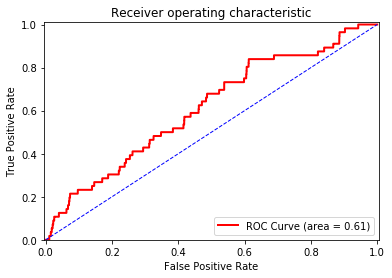

In [91]:
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Unsupervised
### KMeans

#### Preprocess

In [343]:
from sklearn.cluster import KMeans
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() # for scaling/normalizing

feats = ["CRIME_MONTH", "CRIME_HOUR", "CITY_MAP", "CRIME_CATEGORY_NUMBER" ]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


##### CITY_MAP vs CRIME_CATEGORY_NUMBER

In [ ]:
city_map = ["CITY_MAP"]
city_crime_cat = X_prep_df[city_map]
city_crime_cat["CRIME_CATEGORY_NUMBER"] = y_sheriff_df["CRIME_CATEGORY_NUMBER"]
city_crime_cat_df = pd.DataFrame(mms.fit_transform(city_crime_cat))

In [344]:
K_Means = KMeans(n_clusters=4, random_state=True)
K_Means.fit(city_crime_cat_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=True, tol=0.0001, verbose=0)

In [345]:
labels = K_Means.labels_
centers = K_Means.cluster_centers_

##### Plotting only handles __two__ features at a time

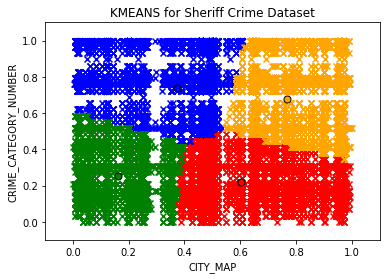

In [347]:
plt.figure

for l, c in zip([0, 1, 2, 3], ["red", "blue", "green", "orange"]):
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(city_crime_cat_df.iloc[current_members, 0], city_crime_cat_df.iloc[current_members, 1], color=c, marker="x")
    plt.plot(current_center[0], current_center[1], "o", markerfacecolor=c, markeredgecolor="k", markersize=7)
    
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.xlabel("CITY_MAP")
plt.ylabel("CRIME_CATEGORY_NUMBER")
plt.title("KMEANS for Sheriff Crime Dataset")

plt.show()

##### CRIME_MONTH vs CRIME_CATEGORY_NUMBER

In [367]:
crime_month = ["CRIME_MONTH"]
month_crime_cat = X_prep_df[crime_month]
month_crime_cat["CRIME_CATEGORY_NUMBER"] = y_sheriff_df["CRIME_CATEGORY_NUMBER"]
month_crime_cat_df = pd.DataFrame(mms.fit_transform(month_crime_cat))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [383]:
K_Means_mc = KMeans(n_clusters=5, random_state=True)
K_Means_mc.fit(month_crime_cat_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=True, tol=0.0001, verbose=0)

In [385]:
labels_mc = K_Means_mc.labels_
centers_mc = K_Means_mc.cluster_centers_

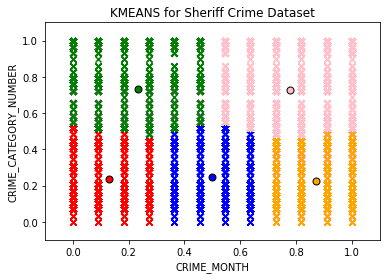

In [386]:
plt.figure

for l, c in zip([0, 1, 2, 3, 4], ["red", "blue", "green", "orange", "pink"]):
    current_members = (labels_mc == l)
    current_center = centers_mc[l]
    
    plt.scatter(month_crime_cat_df.iloc[current_members, 0], month_crime_cat_df.iloc[current_members, 1], color=c, marker="x")
    plt.plot(current_center[0], current_center[1], "o", markerfacecolor=c, markeredgecolor="k", markersize=7)
    
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.xlabel("CRIME_MONTH")
plt.ylabel("CRIME_CATEGORY_NUMBER")
plt.title("KMEANS for Sheriff Crime Dataset")

plt.show()

##### CITY_MAP vs CRIME_MONTH

In [428]:
#month_city = ["CRIME_MONTH", "CITY_MAP"]
month_city = ["CITY_MAP", "CRIME_MONTH"]
month_city = X_prep_df[month_city]

month_city_df = pd.DataFrame(mms.fit_transform(month_city))

In [429]:
K_Means_mm = KMeans(n_clusters=5, random_state=True)
K_Means_mm.fit(month_city_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=True, tol=0.0001, verbose=0)

In [430]:
labels_mm = K_Means_mc.labels_
centers_mm = K_Means_mc.cluster_centers_

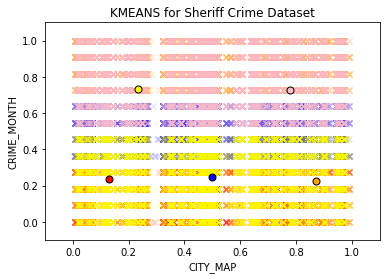

In [440]:
plt.figure

for l, c in zip([0, 1, 2, 3, 4], ["red", "blue", "yellow", "orange", "pink"]):
    current_members = (labels_mm == l)
    current_center = centers_mm[l]
    
    plt.scatter(month_city_df.iloc[current_members, 0], month_city_df.iloc[current_members, 1], color=c, alpha=0.1,marker="x")
    plt.plot(current_center[0], current_center[1], "o", markerfacecolor=c, markeredgecolor="k", markersize=7)
    
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.xlabel("CITY_MAP")
plt.ylabel("CRIME_MONTH")
#plt.legend(loc=2)
plt.title("KMEANS for Sheriff Crime Dataset")

plt.show()